<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-in-the-data" data-toc-modified-id="Read-in-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read in the data</a></span></li><li><span><a href="#Scatter" data-toc-modified-id="Scatter-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scatter</a></span><ul class="toc-item"><li><span><a href="#Documentation" data-toc-modified-id="Documentation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Documentation</a></span></li><li><span><a href="#Set-colors" data-toc-modified-id="Set-colors-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Set colors</a></span></li></ul></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Histograms</a></span></li><li><span><a href="#Multiple-plots:-the-subplot-command" data-toc-modified-id="Multiple-plots:-the-subplot-command-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Multiple plots: the subplot command</a></span></li><li><span><a href="#Themes" data-toc-modified-id="Themes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Themes</a></span></li><li><span><a href="#Complete-Example:-From-data-to-production-plot" data-toc-modified-id="Complete-Example:-From-data-to-production-plot-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Complete Example: From data to production plot</a></span></li></ul></div>

In [1]:
%matplotlib inline
from IPython.display import Image

## Read in the data

In [2]:
import pandas
data = pandas.read_csv('data/body.csv') 
data.head()

,Biacromial,Biiliac,Bitrochanteric,ChestDepth,ChestDia,ElbowDia,WristDia,KneeDia,AnkleDia,Shoulder,...,Bicep,Forearm,Knee,Calf,Ankle,Wrist,Age,Weight,Height,Gender
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1


## Scatter

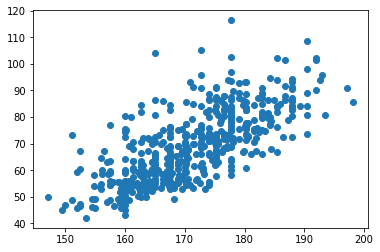

In [3]:
from matplotlib import pyplot
pyplot.scatter(data.Height,data.Weight);

### Documentation

    scatter(x, y, s=20, c=None, marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)

The argument c: 

    c : color, sequence, or sequence of color, optional, default: ‘b’

    c can be a single color format string, or a sequence of color specifications of length N, or a sequence of N numbers to be mapped to colors using the cmap and norm specified via kwargs (see below). Note that c should not be a single numeric RGB or RGBA sequence because that is indistinguishable from an array of values to be colormapped. c can be a 2-D array in which the rows are RGB or RGBA, however, including the case of a single row to specify the same color for all points.

This tells us, we can use the argument c color for the points. We have actually a number of options to specify the color for each point:

+ single color format string
+ sequence of color specifications of length N
+ sequence of N numbers to be mapped to colors using the cmap and norm specified via kwargs (see below)
+ a 2-D array in which the rows are RGB or RGBA

### Set colors

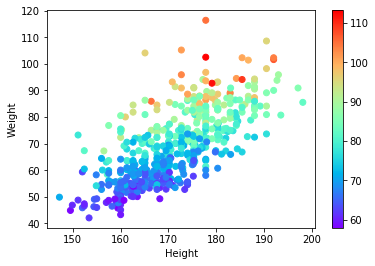

In [5]:
selection = data.query('Age < 61')
pyplot.scatter(selection.Height,selection.Weight, c=selection.Waist);
pyplot.xlabel('Height')
pyplot.ylabel('Weight')
pyplot.set_cmap('rainbow')
pyplot.colorbar()

## Histograms

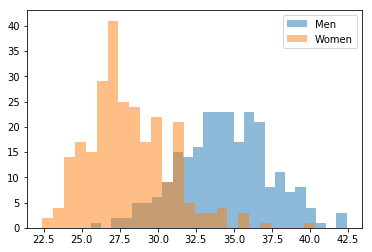

In [12]:
women = data[data.Gender==0]
men = data[data.Gender==1]

#using histtype='barstacked' ensures the bars for the two data sets align
pyplot.hist(men.Bicep,alpha=0.5,histtype='barstacked', bins=25);
pyplot.hist(women.Bicep,alpha=0.5,histtype='barstacked', bins= 25);
pyplot.legend(['Men', 'Women'])

## Multiple plots: the subplot command

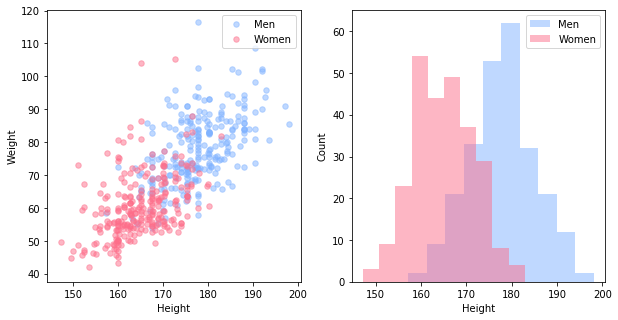

In [16]:
pyplot.figure(figsize=(10,5))

blue = '#FD6E8A'
pink = '#80B3FF'

pyplot.subplot(1,2,1)

pyplot.scatter(men.Height,men.Weight,c=pink,alpha=0.5, s=30)
pyplot.scatter(women.Height,women.Weight,c=blue,alpha=0.5, s=30)
pyplot.xlabel('Height')               
pyplot.ylabel('Weight')
pyplot.legend(['Men', 'Women'])

pyplot.subplot(1,2,2)

pyplot.hist(men.Height,alpha=0.5, histtype='stepfilled',color=pink)
pyplot.hist(women.Height,alpha=0.5, histtype='stepfilled',color=blue)
pyplot.xlabel('Height')               
pyplot.ylabel('Count')
pyplot.legend(['Men', 'Women'])



pyplot.savefig('graph.png', dpi=300)

## Themes

matplotlib comes with a number of style sheets that can be applied to your plots. They're listed here: https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html

Obviously you can define your own style sheets, which comes in handy when you're plotting multiple graphs for a single project and want them have the same style.

(array([ 3.,  9., 23., 54., 44., 49., 37., 29.,  8.,  4.]),
 array([147.2 , 150.77, 154.34, 157.91, 161.48, 165.05, 168.62, 172.19,
        175.76, 179.33, 182.9 ]),
 <a list of 1 Patch objects>)

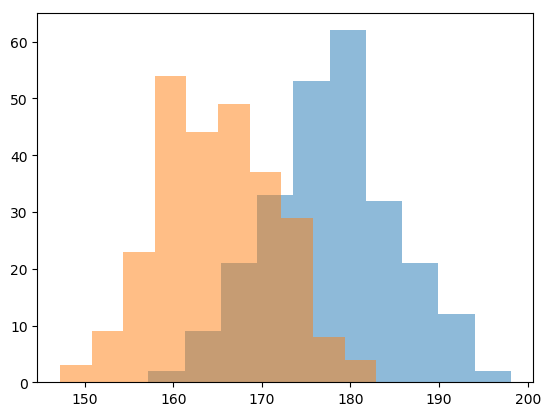

In [19]:
pyplot.style.use('default') # The only thing you need to do is switch the theme on. From then on, the defined style will be used
pyplot.hist(men.height,alpha=0.5, histtype='stepfilled')
pyplot.hist(women.height,alpha=0.5, histtype='stepfilled')

(array([ 3.,  9., 23., 54., 44., 49., 37., 29.,  8.,  4.]),
 array([147.2 , 150.77, 154.34, 157.91, 161.48, 165.05, 168.62, 172.19,
        175.76, 179.33, 182.9 ]),
 <a list of 1 Patch objects>)

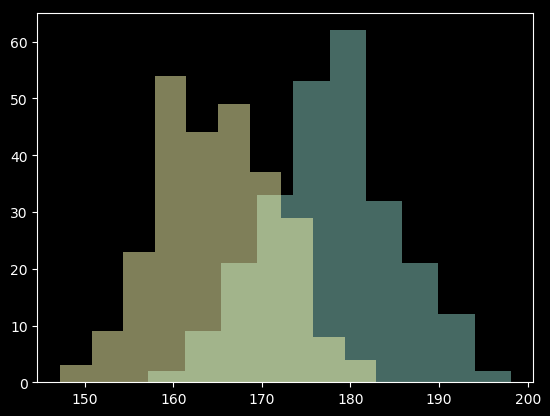

In [20]:
pyplot.style.use('default')
pyplot.style.use('dark_background') # The only thing you need to do is switch the theme on. From then on, the defined style will be used
pyplot.hist(men.height,alpha=0.5, histtype='stepfilled')
pyplot.hist(women.height,alpha=0.5, histtype='stepfilled')

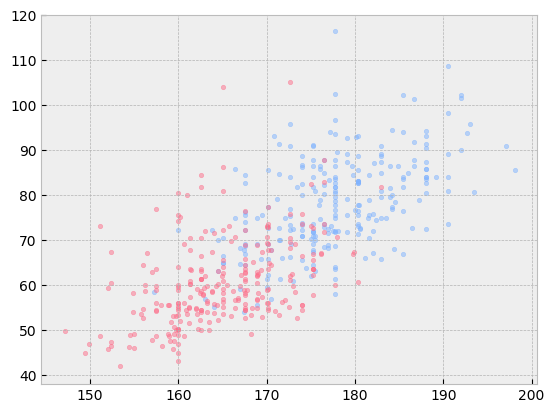

In [21]:
pyplot.style.use('default')
pyplot.style.use('bmh')

pyplot.scatter(men.height,men.weight,c=pink,alpha=0.5, s=10)
pyplot.scatter(women.height,women.weight,c=blue,alpha=0.5, s=10)

## Complete Example: From data to production plot

Let's assume we are interested in the difference in weight between men and women as a function of height.

$w_m=-61.0+0.8h$
$w_m=-61.0+0.8h$


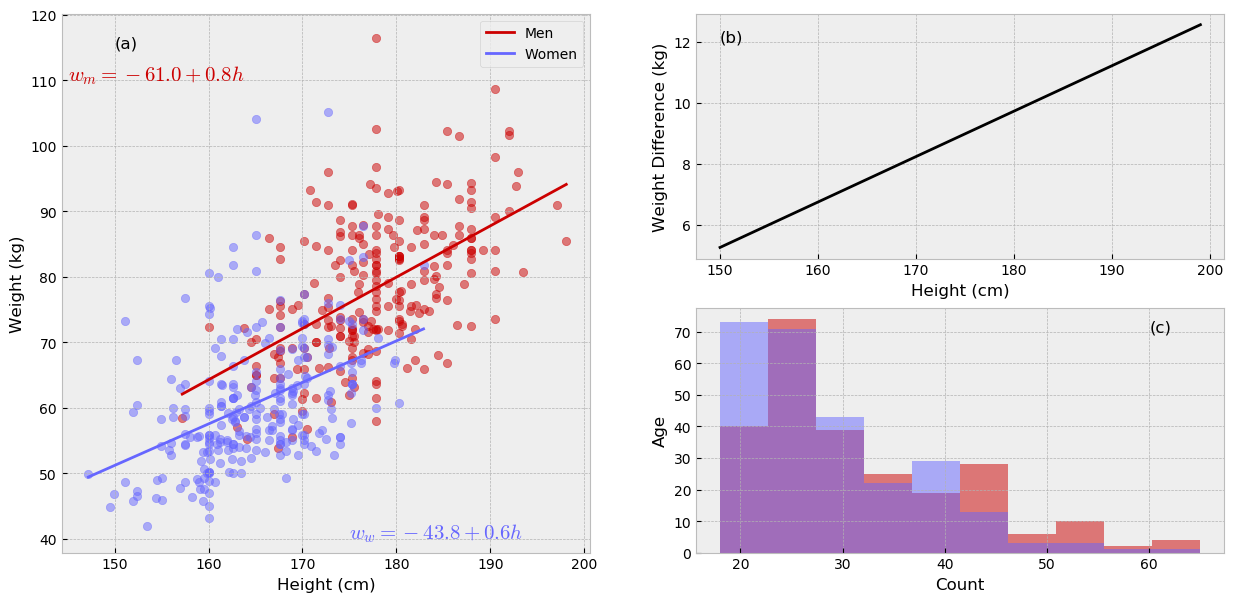

In [23]:
import numpy
import pandas

data = pandas.read_csv('data/body.txt', sep='\t', header=None) 
data.columns = ['age','weight', 'height', 'gender']

women = data[data.gender==0]
men = data[data.gender==1]

wm = men.weight
ww = women.weight
hm = men.height
hw = women.height

# Define the colors
red = "#cc0000"
blue = "#6666ff"

# Set the style and the figure size
pyplot.style.use('bmh')
pyplot.figure(figsize=(15, 7))

#Let's try this later.
#pyplot.xkcd()

# We'll make a figure with two panels
pyplot.subplot2grid((2,2), (0, 0), rowspan=2)

# fit a regression line to the men data
x = [numpy.min(hm),numpy.max(hm)]
z = numpy.polyfit(hm, wm, 1)
pm = numpy.poly1d(z)

# Make a string of the fitted equation 
eq_m = '$w_m=' + str(round(z[1],1)) + '+' + str(round(z[0],1)) + 'h$'
print(eq_m)

# Plot the data for the men
pyplot.scatter(hm,wm,color=red, alpha=0.5)
pyplot.plot(x,pm(x),'-',color=red)

# fit a regression line to the women data
x = [numpy.min(hw),numpy.max(hw)]
z = numpy.polyfit(hw, ww, 1)
pw = numpy.poly1d(z)

# Make a string of the fitted equation
eq_w = '$w_w=' + str(round(z[1],1)) + '+' + str(round(z[0],1)) + 'h$'
print(eq_m)

# Plot the women data
pyplot.scatter(hw,ww,color=blue, alpha=0.5)
pyplot.plot(x,pw(x),'-',color=blue)

# Add a legend 
pyplot.legend(['Men','Women'])

# Add the axis labels
pyplot.xlabel('Height (cm)')
pyplot.ylabel('Weight (kg)')

# Add the equations to the plot
pyplot.text(145,110,eq_m,fontsize=15,color=red)
pyplot.text(175,40,eq_w,fontsize=15,color=blue)

pyplot.text(150,115,'(a)',fontsize=12)

# Now start the second panel
pyplot.subplot2grid((2,2), (0, 1))

xrange = numpy.arange(150,200,1)
ym = pm(xrange)
yw = pw(xrange)
diff = ym - yw
pyplot.plot(xrange, diff,color='k')
pyplot.xlabel('Height (cm)')
pyplot.ylabel('Weight Difference (kg)')
pyplot.text(150,12,'(b)',fontsize=12)

# Now start the third panel
pyplot.subplot2grid((2,2), (1, 1))
settings = pyplot.hist(men.age,alpha=0.5,color=red)

# Reuse the bins used for the men in plotting the women
bins = settings[1]
pyplot.hist(women.age,alpha=0.5,color=blue,bins=bins)
pyplot.ylabel('Age')
pyplot.xlabel('Count')
pyplot.text(60,70,'(c)',fontsize=12)

pyplot.savefig('weight_women_men.png')

# Recreating a graph from the Economist

As an exercise, we'll try our hand at recreating the following plot from the the economist.

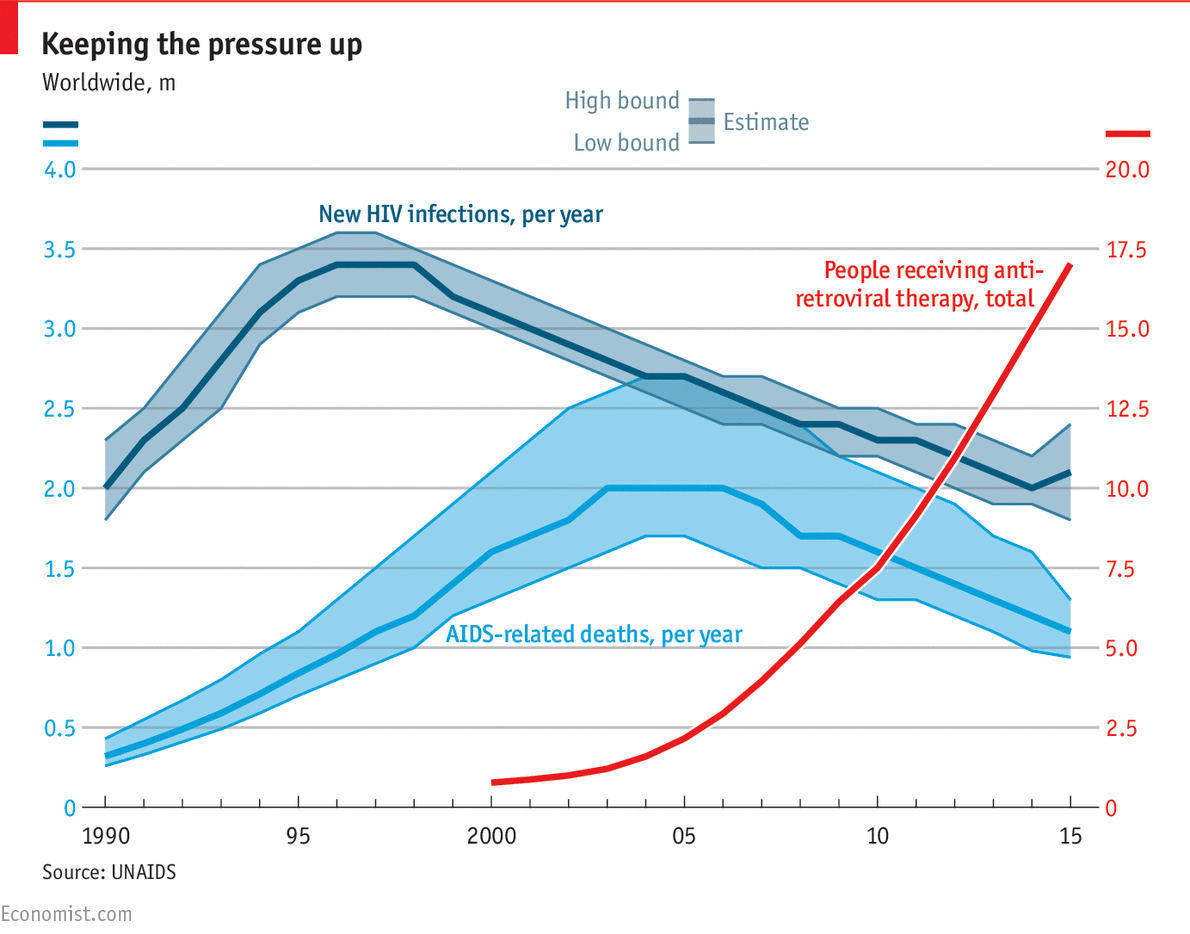

In [36]:
Image("hiv.png")